## Machine Learning Project 03

### Credit Card Fraud Detection

#### Importing Libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#### Reading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Exploratory Data Analysis

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Distribution of the Lagit Transactions

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
valid=df[df['Class']==0]
fraud=df[df['Class']==1]
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [6]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Comparing the Amount of Fraudulent and Non-Fraudulent Transactions

In [8]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Sampling the Data

In [9]:
valid_sample=valid.sample(n=492)

#### Concatinating the Sampled Data

In [10]:
new_dataset=pd.concat([valid_sample,fraud],axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141048,84097.0,1.366346,-1.239154,0.276403,-1.255855,-1.658665,-1.065249,-0.803124,-0.248930,-1.789630,...,-0.170549,-0.325622,-0.034865,0.346209,0.351565,-0.206666,0.005989,0.032303,95.00,0
204957,135523.0,0.268220,-0.029689,-0.333162,-1.927799,-0.518144,-0.463378,-1.066770,-2.684798,-1.047897,...,-1.206301,0.378273,0.102665,-0.041883,0.147751,-0.476965,0.115978,0.298667,19.50,0
148150,89470.0,-0.847264,0.328426,0.918077,-0.832633,1.360270,-0.315848,1.446857,-0.592784,-0.349348,...,-0.319033,-0.339529,0.283112,0.789061,-0.225589,0.079556,-0.398329,-0.414740,22.18,0
93181,64284.0,1.070427,-0.659406,1.698035,2.351043,-1.527266,0.663138,-1.101723,0.228197,-0.420081,...,-0.290639,-0.091552,-0.109924,0.398858,0.458505,0.219978,0.079041,0.047983,69.85,0
72122,54574.0,0.733667,-0.929370,-0.349687,-0.541220,-0.772225,-0.632781,0.013672,-0.032329,1.336499,...,0.114955,-0.054271,-0.400509,-0.078575,0.581386,-0.648532,0.030234,0.083807,264.95,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92671.004065,0.125982,0.130908,-0.014572,-0.036310,0.036018,-0.004452,-0.039790,-0.007136,-0.085809,...,-0.013604,-0.039219,-0.005631,-0.037616,-0.021293,0.020105,0.042926,-0.018085,0.005649,67.376606
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting the Data into Features and Labels

In [13]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
141048   84097.0  1.366346 -1.239154  0.276403 -1.255855 -1.658665 -1.065249   
204957  135523.0  0.268220 -0.029689 -0.333162 -1.927799 -0.518144 -0.463378   
148150   89470.0 -0.847264  0.328426  0.918077 -0.832633  1.360270 -0.315848   
93181    64284.0  1.070427 -0.659406  1.698035  2.351043 -1.527266  0.663138   
72122    54574.0  0.733667 -0.929370 -0.349687 -0.541220 -0.772225 -0.632781   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

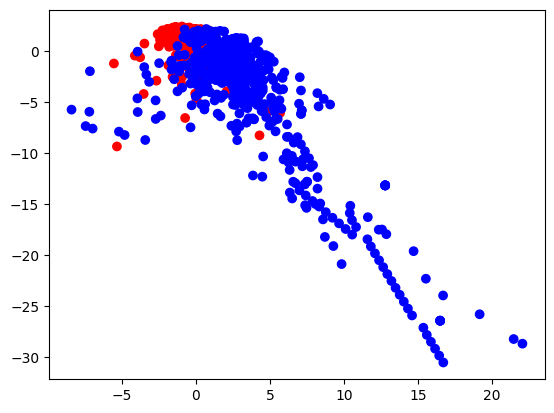

In [14]:
import matplotlib
import matplotlib.pyplot as plt
colors=['red','orange','blue']
plt.scatter(new_dataset['V2'],new_dataset['V1'],c=new_dataset['Class'],cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

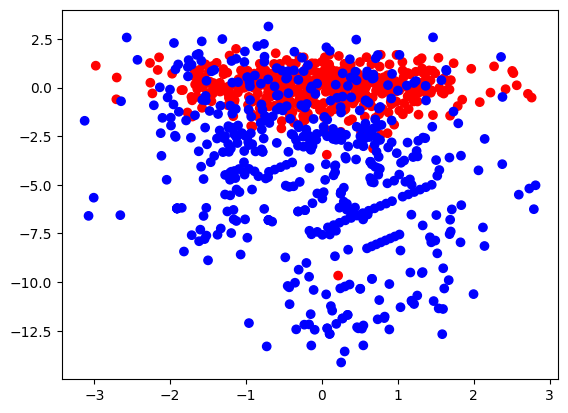

In [15]:
plt.scatter(new_dataset['V13'],new_dataset['V16'],c=new_dataset['Class'],cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

#### Histograms of some Features

<Axes: >

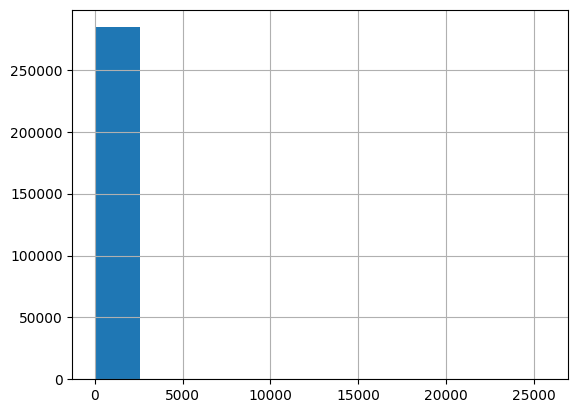

In [16]:
df['Amount'].hist()

<Axes: >

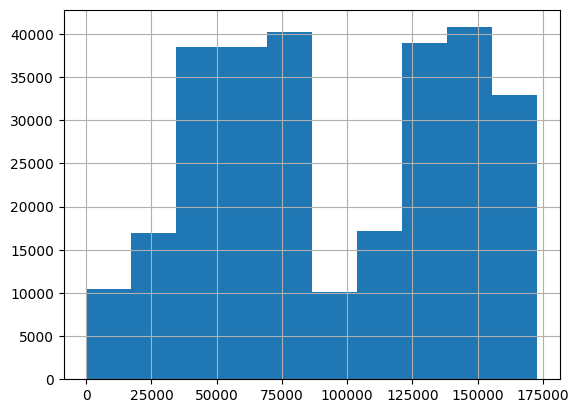

In [17]:
df['Time'].hist()

#### Splitting the Data into Training and Testing Sets

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


#### Model Training

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

#### Model Evaluation

##### Accuracy Score of Training and Testing Sets

In [20]:
X_train_prediction = model.predict(X_train)
Y_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print(('Accuracy of training data : ' , Y_train_accuracy*100))

('Accuracy of training data : ', 90.97839898348158)


In [21]:
X_test_prediction = model.predict(X_test)
Y_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of test data : ', Y_test_accuracy*100)

Accuracy of test data :  91.87817258883248


In [23]:
# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Train the XGBoost model
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, Y_train)

# Train the Random Forest model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [24]:
# Make predictions using each model
linear_pred = linear_reg.predict(X_test)
xgb_pred = xgb_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)

In [25]:
pred_final = (linear_pred + xgb_pred + rf_pred) / 3

In [26]:
# Calculate accuracy (R-squared score)
accuracy = r2_score(Y_test, pred_final)
print("Accuracy (R-squared score):", accuracy)

Accuracy (R-squared score): 0.75087888908655
